**Problem 1**

Step 1

In [1]:
from google.colab import files
file_uploaded=files.upload()

Saving lung_ct.jpg to lung_ct.jpg


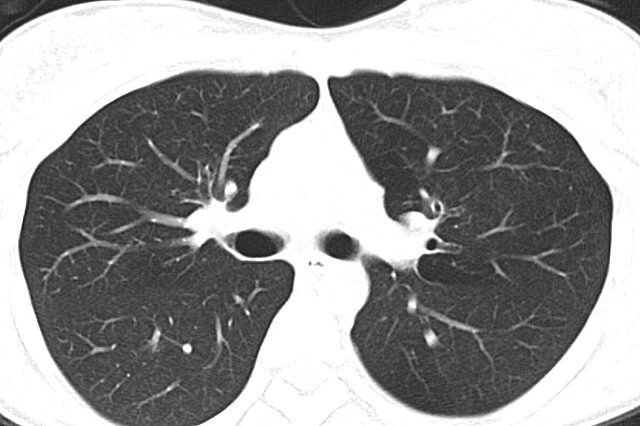

In [2]:
from IPython.display import Image
Image("/content/lung_ct.jpg")

In [3]:
from PIL import Image

#load the image
img = Image.open('/content/lung_ct.jpg')
#Get dimensions
width,height = img.size
print(f"Image Dimensions: {width} x {height} pixels")

Image Dimensions: 640 x 426 pixels


Step 2

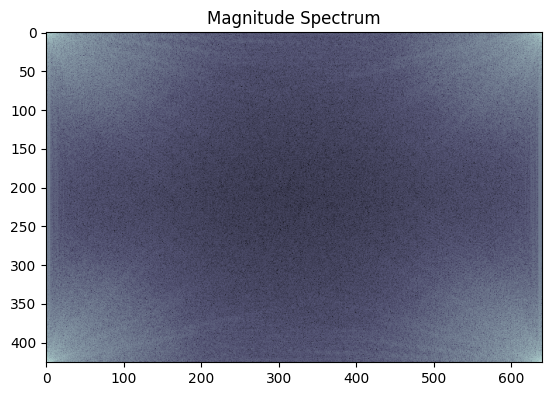

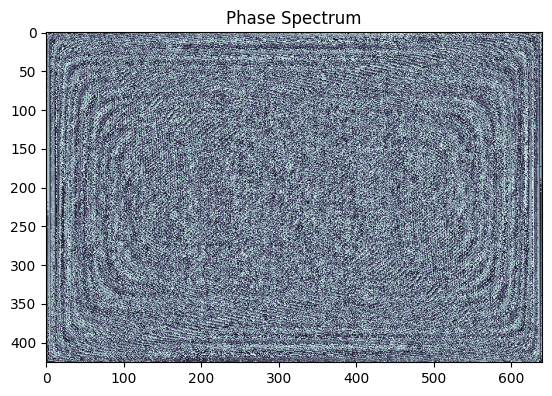

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2

fft_Result = fft2(img)

magnitude_spec = np.abs(fft_Result)

# Get the phase spectrum
phase_spec = np.angle(fft_Result)

plt.imshow(np.log(1 + magnitude_spec), cmap ='bone')
plt.title('Magnitude Spectrum')
plt.show()

plt.imshow((phase_spec), cmap ='bone')
plt.title('Phase Spectrum')
plt.show()

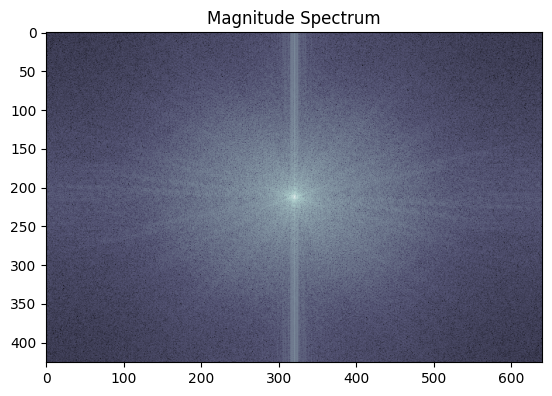

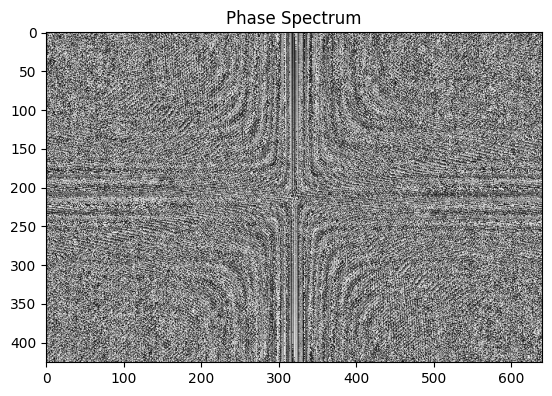

In [5]:

from scipy.fft import fftshift

# Shift the zero-frequency component to the center
magnitude_spec_shifted = fftshift(magnitude_spec)
phase_spec_shifted = fftshift(phase_spec)

# Display the magnitude spectrum
plt.imshow(np.log(1 + magnitude_spec_shifted), cmap='bone')
plt.title('Magnitude Spectrum')
plt.show()

# Display the phase spectrum
plt.imshow(phase_spec_shifted, cmap='gray')
plt.title('Phase Spectrum')
plt.show()


Step 3

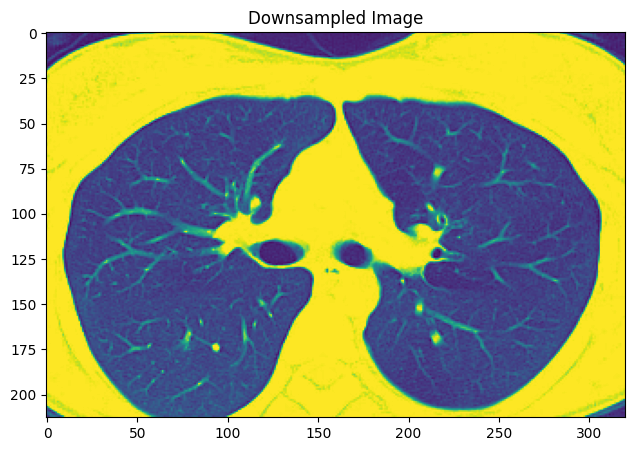

In [6]:
# Convert the image to a NumPy array
img_array = np.array(img)

# Downsample the image to half size by discarding odd-numbered pixels
downsampled_img = img_array[::2, ::2]

# Display the original and downscaled images
plt.figure(figsize=(10, 5))


plt.imshow(downsampled_img)
plt.title('Downsampled Image')

plt.show()


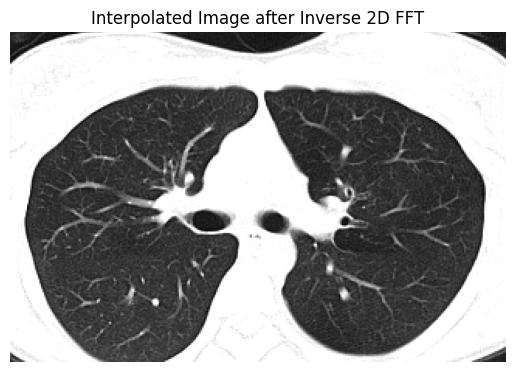

In [7]:
import scipy.fftpack as fft

def zeropad_fft(fft_result, original_shape):
    # Pad zeros in the frequency domain to interpolate
    padded_fft_result = np.zeros(original_shape, dtype=complex)
    padded_fft_result[:fft_result.shape[0], :fft_result.shape[1]] = fft_result
    return padded_fft_result

def interpolate_image(fft_result, original_shape):
    # Perform inverse 2D FFT to interpolate the image
    interpolated_image = fft.ifft2(fft_result).real
    return interpolated_image

# Perform 2D FFT on the downsampled image
fft_Res = fft.fft2(downsampled_img)

# Zeropad the FFT result to interpolate
padded_fft_result = zeropad_fft(fft_Res, fft_Res.shape)

# Interpolate the FFT result back to the original size
interpolated_img = interpolate_image(padded_fft_result, fft_Res.shape)

plt.imshow(interpolated_img, cmap='gray')
plt.axis('off')
plt.title('Interpolated Image after Inverse 2D FFT')
plt.show()


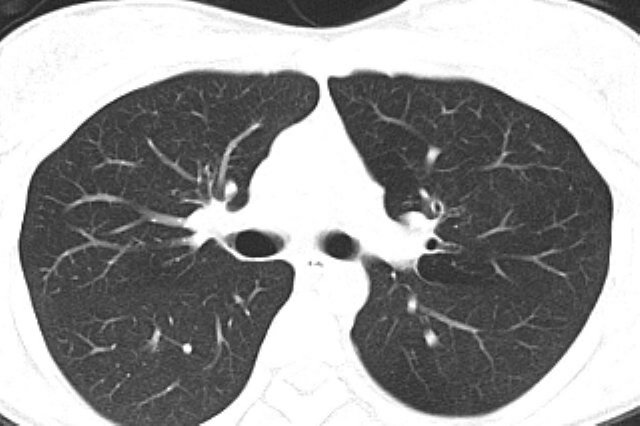

In [8]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

#Create an empty image with double the dimensions of the downsampled image
upsampled_image = np.zeros((downsampled_img.shape[0] * 2, downsampled_img.shape[1] * 2, 3), dtype=np.uint8)

#Perform linear interpolation to upsample the image
for i in range(upsampled_image.shape[0]):
    for j in range(upsampled_image.shape[1]):
        # Compute corresponding position in the downsampled image
        x_down = i // 2
        y_down = j // 2

#Compute the fractional parts for interpolation
        dx = i / 2 - x_down
        dy = j / 2 - y_down

#Perform linear interpolation
        interpolated_pixel = (1 - dx) * (1 - dy) * downsampled_img[x_down, y_down] + \
                             dx * (1 - dy) * downsampled_img[min(x_down + 1, downsampled_img.shape[0] - 1), y_down] + \
                             (1 - dx) * dy * downsampled_img[x_down, min(y_down + 1, downsampled_img.shape[1] - 1)] + \
                             dx * dy * downsampled_img[min(x_down + 1, downsampled_img.shape[0] - 1), min(y_down + 1, downsampled_img.shape[1] - 1)]

#Assign the interpolated pixel to the upsampled image
        upsampled_image[i, j] = interpolated_pixel.astype(np.uint8)

#Display the original, downsampled, and upsampled images

cv2_imshow(upsampled_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [26]:
def mean_squared_error(original, interpolated):
    squared_error = np.square(original - interpolated)
    mse = np.mean(squared_error)
    return mse

In [31]:
# Convert the original image to a NumPy array
original_array = np.array(img)


In [32]:
import cv2

# Resize the original image to match the dimensions of the interpolated image
resized_original = cv2.resize(original_array, (interpolated_img.shape[1], interpolated_img.shape[0]))

# Compute mean squared error (MSE) between original and downsampled images
mse_downsampled = mean_squared_error(resized_original, interpolated_img)


In [33]:
# Convert the upsampled image to grayscale for accurate comparison
upsampled_gray = cv2.cvtColor(upsampled_image, cv2.COLOR_BGR2GRAY)

# Resize the upsampled image to match the dimensions of the original image
resized_upsampled = cv2.resize(upsampled_gray, (original_array.shape[1], original_array.shape[0]))

# Compute mean squared error (MSE) between original and upsampled images
mse_upsampled = mean_squared_error(original_array, resized_upsampled)


print("Mean Squared Error (MSE) between original and downsampled images:", mse_downsampled)
print("Mean Squared Error (MSE) between original and upsampled images:", mse_upsampled)

Mean Squared Error (MSE) between original and downsampled images: 63.660401995305165
Mean Squared Error (MSE) between original and upsampled images: 13.58753301056338
